#IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import graphviz

random.seed(100)

#CLEANING UP THE DATA

##HEPATITIS DATA SET

Cleaning up the Hepatitis data set

In [ ]:
url_hepatitis="http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"

hepatitis_names=['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 
                 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 
                 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN',
                 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'
                 ]

df_hepatitis=pd.read_csv(url_hepatitis, names=hepatitis_names)
df_hepatitis=df_hepatitis[~df_hepatitis.eq('?').any(1)]
df_hepatitis.replace([1, 2,'1','2'],[0, 1, '0', '1'], inplace=True)
df_hepatitis = df_hepatitis.astype('float')
df_hepatitis = df_hepatitis.reset_index(drop=True)
df_hepatitis

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,1.0,34.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,75.0,0.0
1,1.0,39.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.3,78.0,30.0,4.4,85.0,0.0
2,1.0,32.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,59.0,249.0,3.7,54.0,0.0
3,1.0,41.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,81.0,60.0,3.9,52.0,0.0
4,1.0,30.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.2,57.0,144.0,4.9,78.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.0,45.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.3,85.0,44.0,4.2,85.0,1.0
76,0.0,49.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.4,85.0,70.0,3.5,35.0,1.0
77,1.0,31.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.2,75.0,173.0,4.2,54.0,1.0
78,1.0,53.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1.0


Basic analysis on the hepatitis data set.

In [ ]:
N_hepatitis = len(df_hepatitis)
hepatitis_positive = sum(df_hepatitis.loc[:, 'Class'])
hepatitis_negative = N_hepatitis - hepatitis_positive

print('There are %.0d data points in the hepatitis data set.' % (N_hepatitis))
print('There are %.0d (%.2f) positive data points in the hepatitis data set.' % (hepatitis_positive, hepatitis_positive/N_hepatitis))
print('There are %.0d (%.2f) negative data points in the hepatitis data set.' % (hepatitis_negative, hepatitis_negative/N_hepatitis))

There are 80 data points in the hepatitis data set.
There are 67 (0.84) positive data points in the hepatitis data set.
There are 13 (0.16) negative data points in the hepatitis data set.


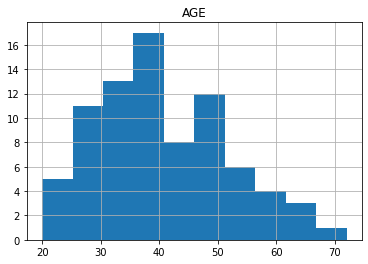

In [ ]:
# Heptatis Age Feature Frequency 
df_hepatitis_age_count = df_hepatitis.hist(column="AGE")

Basic Feature Analysis of the hepatitis data set.

In [ ]:
df_mean_std = df_hepatitis.agg([np.mean, np.std])
df_mean_std

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
mean,0.837500,40.66250,0.137500,0.525000,0.737500,0.350000,0.612500,0.850000,0.837500,0.525000,0.812500,0.687500,0.850000,0.875000,1.221250,102.912500,82.025000,3.843750,62.512500,0.41250
std,0.371236,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539


Gaussian Distribution Analysis

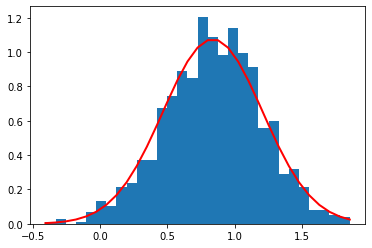

In [ ]:
# Hepatitis Class Feature Gaussian Distribution
df_class_mean_std = df_mean_std.loc[:, ['Class']]
mean = df_class_mean_std["Class"][0] 
std = df_class_mean_std["Class"][1] 
dist_hepatitis = np.random.normal(mean, std, 1000)

count, bins, ignored = plt.hist(dist_hepatitis, 30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()

Cosine Similarity between each feature and the Class Label

In [ ]:
# Cosine similarity
cosine_similarity_hepatitis = []
index = 0
for column in df_hepatitis.loc[:, df_hepatitis.columns != "Class"]:
    numerator = 0;
    denominator_1 = 0
    denominator_2 = 0
    for i in range(0,len(df_hepatitis[column])):
      numerator = numerator + (df_hepatitis.loc[i].at[column] * df_hepatitis.loc[i].at["Class"])
      denominator_1 = denominator_1 + (df_hepatitis.loc[i].at["Class"] * df_hepatitis.loc[i].at["Class"])
      denominator_2 = denominator_2 + (df_hepatitis.loc[i].at[column] * df_hepatitis.loc[i].at[column])
    
    print("Cosine Similarity between %s and Class Label:" % column)
    cosine_similarity_hepatitis.append((column, (numerator)/(np.sqrt(denominator_1) * np.sqrt(denominator_2)),index))
    print((numerator)/(np.sqrt(denominator_1) * np.sqrt(denominator_2)))
    print()
    index = index + 1

print(cosine_similarity_hepatitis)

Cosine Similarity between AGE and Class Label:
0.859448522926326

Cosine Similarity between SEX and Class Label:
0.40519020777606646

Cosine Similarity between STEROID and Class Label:
0.6974927175058553

Cosine Similarity between ANTIVIRALS and Class Label:
0.7634451319622273

Cosine Similarity between FATIGUE and Class Label:
0.6002842255014931

Cosine Similarity between MALAISE and Class Label:
0.7853749994333907

Cosine Similarity between ANOREXIA and Class Label:
0.8148371700506947

Cosine Similarity between LIVER BIG and Class Label:
0.8059701492537313

Cosine Similarity between LIVER FIRM and Class Label:
0.6786415629786701

Cosine Similarity between SPLEEN PALPABLE and Class Label:
0.8485822579161418

Cosine Similarity between SPIDERS and Class Label:
0.8236662258223169

Cosine Similarity between ASCITES and Class Label:
0.9185437189662377

Cosine Similarity between VARICES and Class Label:
0.9053265735030821

Cosine Similarity between BILIRUBIN and Class Label:
0.6632280808669

#KNN

##Distance functions

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

##KNN Object

In [ ]:
class KNN:

  def __init__(self, k=1, dist_fn=euclidean):
    self.k = k
    self.dist_fn = dist_fn

  def fit(self, X, y, k, c):
    self.X = X            # This will be training data that is used to calculate the distance
    self.y = y            # This is the class label
    self.k = k            # K-value for K neighbors
    self.C = c            # C is the number of classes.

  def distance_matrix(self, X_test):
    distance_matrix = pd.DataFrame()

    X_train = self.X.to_numpy()
    X_test = X_test.to_numpy()

    distances = self.dist_fn(X_test[:,None,:], X_train[None,:,:])
    distances = distances.transpose()
    
    self.distance_m = pd.DataFrame(distances)

  def predict(self, k):
    '''Makes a prediction using the stored training data and the test data given as argument'''
    
    probability_matrix = pd.DataFrame()

    self.k = k

    for column in self.distance_m:
      df_column = self.distance_m[column].to_frame()
      df_column.insert(1, "Class Label", self.y, True)
      df_column = df_column.sort_values(by=df_column.columns[0])
      probability_row = np.bincount(df_column.iloc[:self.k, 1],minlength=self.C)
      probability_row = pd.DataFrame(np.reshape(probability_row,(1, len(probability_row))));
      probability_matrix = pd.concat([probability_matrix, probability_row], ignore_index=True, sort=False)
    
    return probability_matrix / self.k

  def calculate_accuracy(self, probability_matrix, y_test): 
    
    accuracy = 0

    for i in range(len(probability_matrix)):
      row = probability_matrix.iloc[i,:]
      index = row.idxmax()
      if (index == y_test.iloc[i,0]) :
        accuracy = accuracy + 1

    return accuracy/len(y_test)

In [ ]:
def find_best_k(df, C, class_name ,dist_fn=euclidean):
  train=df.sample(frac=0.33,random_state=200) #random state is a seed value
  validation_test=df.drop(train.index)
  validation= validation_test.sample(frac=0.5,random_state=200)
  test = validation_test.drop(validation.index)

  k_values = range(1,10)

  training_accuracy = []
  validation_accuracy = []

  knn = KNN(dist_fn=dist_fn)
  knn.fit(train.loc[:, train.columns != class_name], train.loc[:, train.columns == class_name], 1, C)

  knn.distance_matrix(validation.loc[:, validation.columns != class_name])


  for i in k_values:
    prob_validation = knn.predict(i)
    accuracy_validation = knn.calculate_accuracy(prob_validation,validation.loc[:, validation.columns == class_name])
    validation_accuracy.append(accuracy_validation)

  knn.distance_matrix(train.loc[:, train.columns != class_name])

  for i in k_values:
    prob_train = knn.predict(i)
    accuracy_train = knn.calculate_accuracy(prob_train,train.loc[:, train.columns == class_name])
    training_accuracy.append(accuracy_train)

  max_accuracy = max(validation_accuracy)
  best_k = validation_accuracy.index(max_accuracy) + 1

  knn.distance_matrix(test.loc[:, test.columns != class_name])
  prob_test = knn.predict(best_k)
  accuracy_test = knn.calculate_accuracy(prob_test,test.loc[:, test.columns == class_name])

  plt.plot(k_values, training_accuracy, marker='d', color='black', label='training')
  plt.plot(k_values, validation_accuracy, marker='o', color='blue', label='validation')
  plt.plot(best_k, accuracy_test, marker='*', color='red', label='testing')
  plt.xlabel("K")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.savefig('iris_DT_chooseDepth.png',dpi=300,bbox_inches='tight')

  print(accuracy_test)
  print(best_k)

In [ ]:
def decision_boundary(df, C, k,x_name,y_name,class_name,dist_fn=euclidean):

  x = df.to_numpy() 

  x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
  x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

  x0, x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T

  x_all = pd.DataFrame(x_all)

  knn = KNN(dist_fn=dist_fn)

  train=df.sample(frac=0.33,random_state=200)
  knn.fit(train.loc[:, train.columns != class_name], train.loc[:, train.columns == class_name], 1, C)

  knn.distance_matrix(x_all)
  y_prob_all = knn.predict(k)
  y_prob_all = y_prob_all.to_numpy()
  x_all = x_all.to_numpy()

  knn.distance_matrix(train.loc[:, train.columns != class_name])
  y_train_prob = knn.predict(k)
  y_train_prob = y_train_prob.to_numpy()
  x_train = train.loc[:, train.columns != class_name].to_numpy()

  zeros_1 = np.zeros((x_train.shape[0],1))
  zeros_2 = np.zeros((x_all.shape[0],1))

  y_prob_all = np.append(y_prob_all, zeros_2, axis = 1)
  y_train_prob = np.append(y_train_prob, zeros_1, axis = 1)

  plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
  plt.ylabel(x_name)
  plt.xlabel(y_name)
  plt.show()

# DECISION TREES

Cost Functions

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

Node and Decision tree class

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def evaluate_acc(self, true_y, predict_y):
        test_accuracy = np.sum(predict_y == true_y)/true_y.shape[0]
        return test_accuracy

    def fit(self, data, labels):
      self.data = data
      self.labels = labels
      if self.num_classes is None:
          self.num_classes = np.max(labels) + 1
      #below are initialization of the root of the decision tree
      self.root = Node(np.arange(data.shape[0]), None)
      self.root.data = data
      self.root.labels = labels
      self.root.num_classes = self.num_classes
      self.root.depth = 0
      #to recursively build the rest of the tree
      self._fit_tree(self.root)
      return self

    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    def predict(self, data_test):
      class_probs = np.zeros((data_test.shape[0], self.num_classes))
      for n, x in enumerate(data_test):
          node = self.root
          #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
          while node.left:
              if x[node.split_feature] <= node.split_value:
                  node = node.left
              else:
                  node = node.right
          #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
          class_probs[n,:] = node.class_prob
      return class_probs

In [ ]:
def find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va, cost_fn=cost_misclassification, min_leaf_instances=1, num_class=None):
    model_choices=[]
    train_acc = []
    valid_acc = []

    n_train = y_train_tr.shape[0]
    n_valid = y_train_va.shape[0]

    for k in range(1, 10):
        dt = DecisionTree(num_classes=num_class, max_depth=k, cost_fn=cost_fn, min_leaf_instances=min_leaf_instances)
        y_train_tr_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_tr)
        y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
        acc_tr = dt.evaluate_acc(y_train_tr, y_train_tr_pred)

        y_train_va_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_va)
        y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
        acc_va = dt.evaluate_acc(y_train_va, y_train_va_pred)
        
        model_choices.append(k)
        train_acc.append(acc_tr)
        valid_acc.append(acc_va)

    
    best_depth = model_choices[valid_acc.index(max(valid_acc))]

    return best_depth, model_choices, train_acc, valid_acc


def predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test, cost_fn=cost_misclassification, min_leaf_instances=1, num_class=None):
    dt = DecisionTree(num_classes=num_class, max_depth=best_depth, cost_fn=cost_fn, min_leaf_instances=min_leaf_instances)
    y_test_prob = dt.fit(x_train, y_train).predict(x_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)
    test_accuracy = dt.evaluate_acc(y_test, y_test_pred)
    print(f'best depth = {best_depth}, test accuracy = {test_accuracy}')

    plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
    plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
    plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
    plt.xlabel("Tree depth")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.savefig('iris_DT_chooseDepth.png',dpi=300,bbox_inches='tight')
    return None

def display_predict_results(best_depth, x_train, y_train, x_test, y_test, cost_fn=cost_misclassification, min_leaf_instances=1, num_class=None):
    tree = DecisionTree(num_classes=num_class, max_depth=best_depth, cost_fn=cost_fn, min_leaf_instances=min_leaf_instances)
    probs_test = tree.fit(x_train, y_train).predict(x_test)
    y_pred = np.argmax(probs_test,1)
    accuracy = tree.evaluate_acc(y_test, y_pred)
    print(f'accuracy is {accuracy*100:.1f}.')
    #visualization
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
    plt.legend()
    plt.show()
    return None

# Experiments

##KNN

###Hepatitis Data Set

####Choosing the Correct Features

Since KNN suffers from the curse of dimensionality we cannot include every single feature in our KNN algoritmhm. In order to choose features we will look at the cosine similarity between the Class Label and all of the features and we will select the highest ones. For the purpose of this assignment we will do KNN up to 5 features.

####Splitting Data according to the different number of features

In [ ]:
cosine_similarity_hepatitis = sorted(
    cosine_similarity_hepatitis,
    key=lambda t: t[1]
)

print(cosine_similarity_hepatitis)
df_hepatitis_feature_1 = df_hepatitis.iloc[:, [17, 0]]
df_hepatitis_feature_2 = df_hepatitis.iloc[:, [12, 17, 0]]
df_hepatitis_feature_3 = df_hepatitis.iloc[:, [18,12, 17, 0]]
df_hepatitis_feature_4 = df_hepatitis.iloc[:, [13,18, 12,17, 0]]
df_hepatitis_feature_5 = df_hepatitis.iloc[:, [1,13, 18,12,17, 0]]

[('SEX', 0.40519020777606646, 1), ('HISTOLOGY', 0.4466063805620691, 18), ('FATIGUE', 0.6002842255014931, 4), ('BILIRUBIN', 0.663228080866904, 13), ('LIVER FIRM', 0.6786415629786701, 8), ('STEROID', 0.6974927175058553, 2), ('SGOT', 0.7121037412088367, 15), ('ANTIVIRALS', 0.7634451319622273, 3), ('ALK PHOSPHATE', 0.777343065451528, 14), ('MALAISE', 0.7853749994333907, 5), ('LIVER BIG', 0.8059701492537313, 7), ('ANOREXIA', 0.8148371700506947, 6), ('SPIDERS', 0.8236662258223169, 10), ('SPLEEN PALPABLE', 0.8485822579161418, 9), ('AGE', 0.859448522926326, 0), ('VARICES', 0.9053265735030821, 12), ('PROTIME', 0.913233024272131, 17), ('ASCITES', 0.9185437189662377, 11), ('ALBUMIN', 0.9335187621006231, 16)]


####Finding the Best K for All the Data Sets (different number of features) with Euclidean Distance

0.8518518518518519
1


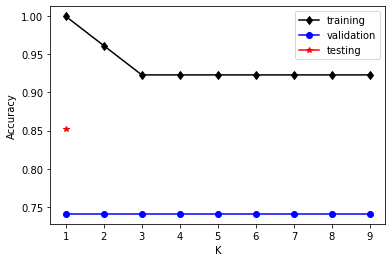

In [ ]:
find_best_k(df_hepatitis_feature_1, 2, 'Class')

0.8518518518518519
1


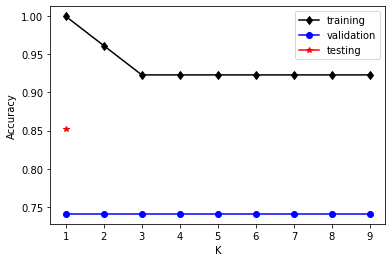

In [ ]:
find_best_k(df_hepatitis_feature_2, 2, 'Class')

0.9629629629629629
2


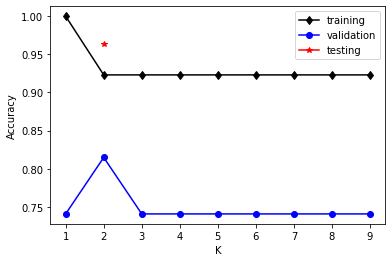

In [ ]:
find_best_k(df_hepatitis_feature_3, 2, 'Class')

0.9629629629629629
2


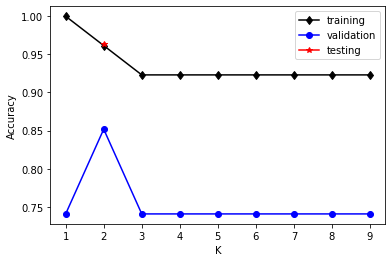

In [ ]:
find_best_k(df_hepatitis_feature_4, 2, 'Class')

0.8518518518518519
1


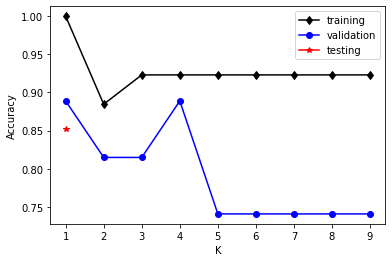

In [ ]:
find_best_k(df_hepatitis_feature_5, 2, 'Class')

As we can see with Euclidean distance we get the best testing accuracy with 3,4 or 5 features and K=2.

####Finding the Best K for All the Data Sets (different number of features) with Manhattan Distance

0.8518518518518519
1


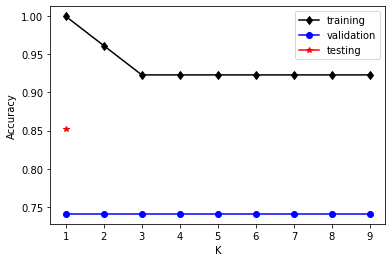

In [ ]:
find_best_k(df_hepatitis_feature_1, 2,'Class',dist_fn=manhattan)

0.8518518518518519
1


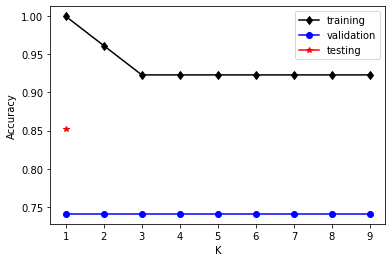

In [ ]:
find_best_k(df_hepatitis_feature_2, 2,'Class',dist_fn=manhattan)

0.9629629629629629
2


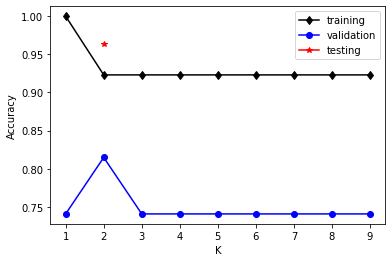

In [ ]:
find_best_k(df_hepatitis_feature_3, 2,'Class',dist_fn=manhattan)

0.9629629629629629
2


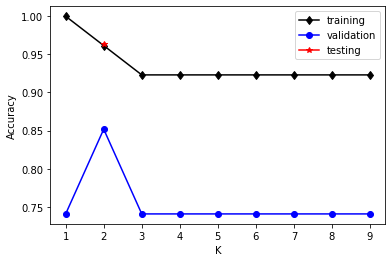

In [ ]:
find_best_k(df_hepatitis_feature_4, 2,'Class',dist_fn=manhattan)

0.8888888888888888
4


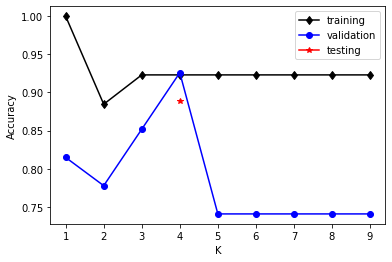

In [ ]:
find_best_k(df_hepatitis_feature_5, 2,'Class',dist_fn=manhattan)

As we can see with Manhattan distance we get the best testing accuracy with 3 or 4 features and K=2.

####Decision Boundary Graph

For the Decision boundary graph we will use 2 features as it is the only one that we can really graph. We will use K=1 with Euclidean distance as it is the one with the best testing accuracy.

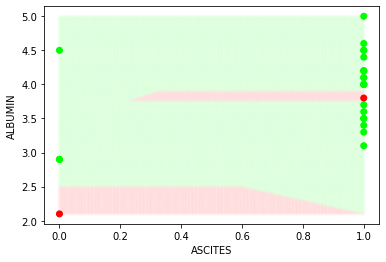

In [ ]:
decision_boundary(df_hepatitis_feature_2, 2, 1, "ALBUMIN", "ASCITES",'Class')

####Choosing the Correct Features

Since KNN suffers from the curse of dimensionality we cannot include every single feature in our KNN algoritmhm. In order to choose features we will look at the cosine similarity between the Class Label and all of the features and we will select the highest ones. For the purpose of this assignment we will do KNN up to 5 features.

####Splitting Data according to the different number of features

In [ ]:
cosine_similarity_messidor = sorted(
    cosine_similarity_messidor,
    key=lambda t: t[1]
)

print(cosine_similarity_messidor)

df_messidor_feature_1 = df_messidor.iloc[:, [0, 19]]
df_messidor_feature_2 = df_messidor.iloc[:, [0, 16, 19]]
df_messidor_feature_3 = df_messidor.iloc[:, [2,0, 16, 19]]
df_messidor_feature_4 = df_messidor.iloc[:, [0,2, 16,17, 19]]
df_messidor_feature_5 = df_messidor.iloc[:, [0,2, 3,16,17, 19]]

[('EX5', 0.24519626194783956, 13), ('EX4', 0.2555505035705235, 12), ('EX7', 0.2673425057277429, 15), ('EX6', 0.2768583239200384, 14), ('EX3', 0.37366938629982605, 11), ('AM/FM Classification', 0.3989565891886087, 18), ('EX2', 0.45915442850611354, 10), ('EX1', 0.5323515350284848, 9), ('EX0', 0.5650947780779391, 8), ('MA:1.0', 0.6439247077350536, 7), ('MA:0.9', 0.6651008352726507, 6), ('Retinal Abnormality', 0.6831471261212345, 1), ('MA:0.8', 0.6839148942862577, 5), ('MA:0.7', 0.6987303096874561, 4), ('MA:0.6', 0.7098188335426898, 3), ('Diameter of Optic Disk', 0.7153701131916663, 17), ('MA:0.5', 0.7174342723652684, 2), ('Macula Dist Optic Disk', 0.7278556495417744, 16), ('Quality', 0.7298588797205168, 0)]


####Finding the Best K for All the Data Sets (different number of features) with Euclidean Distance

0.4987012987012987
1


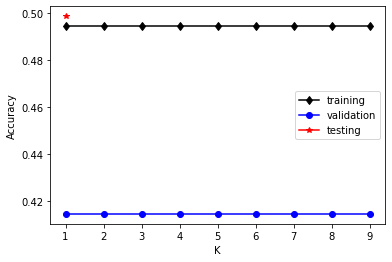

In [ ]:
find_best_k(df_messidor_feature_1, 2, 'Class Label')

0.4987012987012987
1


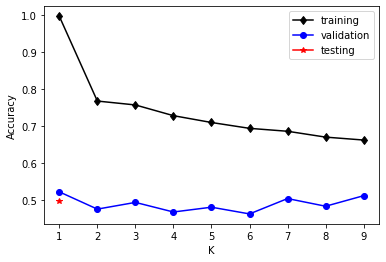

In [ ]:
find_best_k(df_messidor_feature_2, 2, 'Class Label')

0.5428571428571428
3


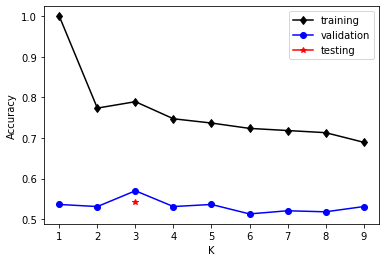

In [ ]:
find_best_k(df_messidor_feature_3, 2, 'Class Label')

0.5428571428571428
3


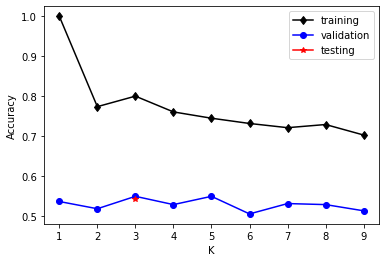

In [ ]:
find_best_k(df_messidor_feature_4, 2, 'Class Label')

0.6519480519480519
3


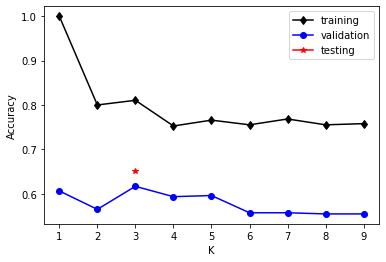

In [ ]:
find_best_k(df_messidor_feature_5, 2, 'Class Label')

As we can see with Euclidean distance we get the best testing accuracy with 5 features and K=3.

####Finding the Best K for All the Data Sets (different number of features) with Manhattan Distance

0.4987012987012987
1


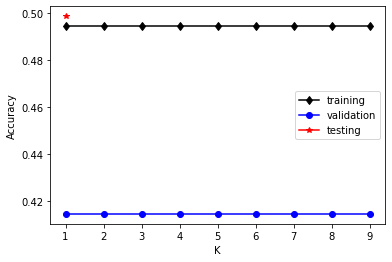

In [ ]:
find_best_k(df_messidor_feature_1, 2,'Class Label',dist_fn=manhattan)

0.4987012987012987
1


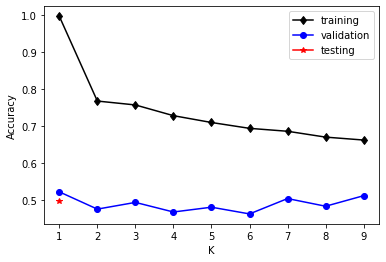

In [ ]:
find_best_k(df_messidor_feature_2, 2,'Class Label',dist_fn=manhattan)

0.5428571428571428
3


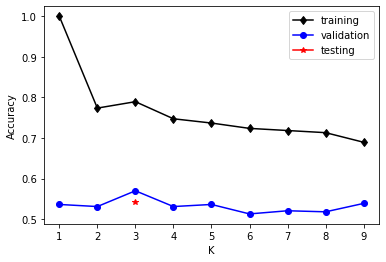

In [ ]:
find_best_k(df_messidor_feature_3, 2,'Class Label',dist_fn=manhattan)

0.5792207792207792
5


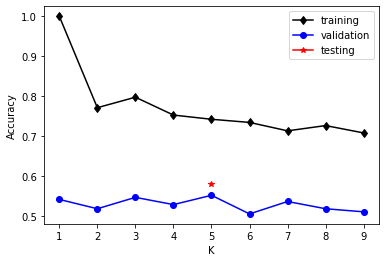

In [ ]:
find_best_k(df_messidor_feature_4, 2,'Class Label',dist_fn=manhattan)

0.6441558441558441
3


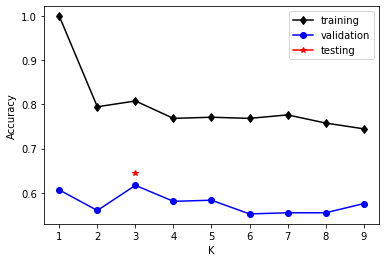

In [ ]:
find_best_k(df_messidor_feature_5, 2,'Class Label',dist_fn=manhattan)

As we can see with Manhattan distance we get the best testing accuracy with 5 features and K=3.

####Decision Boundary Graph

For the Decision boundary graph we will use 2 features as it is the only one that we can really graph. We will use K=3 with Euclidean distance as it is the one with the best testing accuracy.

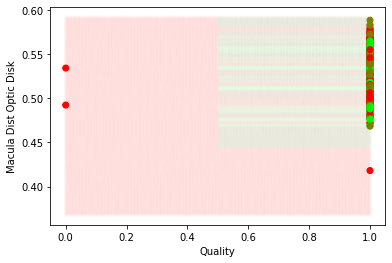

In [ ]:
decision_boundary(df_messidor_feature_2, 2, 2, "Macula Dist Optic Disk", "Quality", 'Class Label')

## Decision Trees

## Hepatitis Data Set

### Hepatitis Data Set when the missing values deleted

####Ex 1: Standard dataset

In [ ]:
dataset_hepatitis = df_hepatitis.values
x, y = dataset_hepatitis[:, 1:],dataset_hepatitis[:, 0].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, shuffle = True)
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x_train, y_train, test_size=0.5, random_state=1, shuffle=True)

best depth = 1, test accuracy = 0.8333333333333334


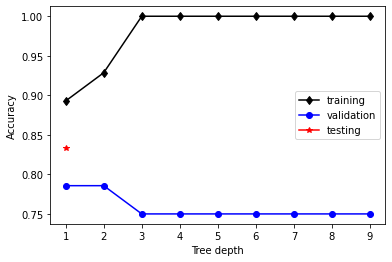

In [ ]:
# Find the best depth on the validation set
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test)

####Ex 2: 2 Best Features' Cosine Similarity

In [ ]:
df_important_features = df_hepatitis.iloc[:, [0, 12, 17]] 
dataset_hepatitis = df_important_features.values
x, y = dataset_hepatitis[:, 1:],dataset_hepatitis[:, 0].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, shuffle = True)
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x_train, y_train, test_size=0.5, random_state=1, shuffle=True)

best depth = 2, test accuracy = 0.875


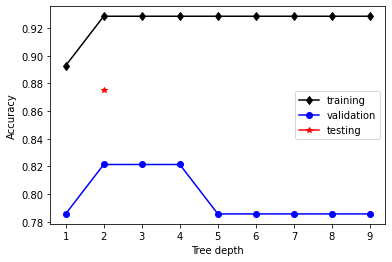

In [ ]:
# Find the best depth on the validation set
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test)

accuracy is 87.5.


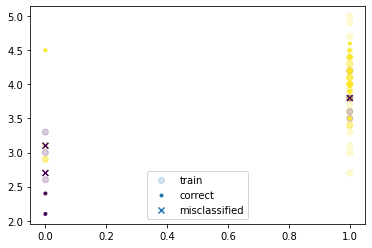

In [ ]:
# Display model's result on x_test set 
display_predict_results(best_depth, x_train, y_train, x_test, y_test)

####Ex 3: 3 Best Features' Cosine Similarity

In [ ]:
df_important_features = df_hepatitis.iloc[:, [0, 12, 17, 18]] 
dataset_hepatitis = df_important_features.values
x, y = dataset_hepatitis[:, 1:],dataset_hepatitis[:, 0].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, shuffle = True)
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x_train, y_train, test_size=0.5, random_state=1, shuffle=True)

best depth = 2, test accuracy = 0.875


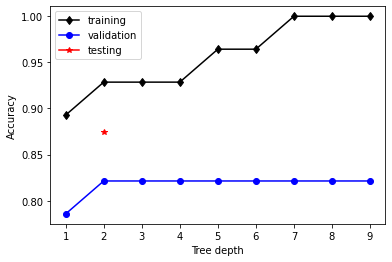

In [ ]:
# Find the best depth on the validation set
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test)

accuracy is 87.5.


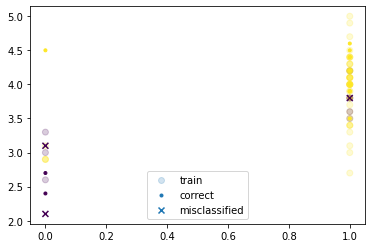

In [ ]:
# Display model's result on x_test set 
display_predict_results(best_depth, x_train, y_train, x_test, y_test)

####Ex 4: Different cost functions for Ex3:3 best features
Br comparison, the test accuracy of misclassification cost is a bit higher than entropy cost and gini index cost in this dataset.

best depth = 2, test accuracy = 0.875
accuracy is 87.5.


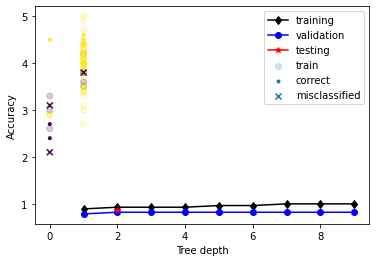

best depth = 1, test accuracy = 0.8333333333333334
accuracy is 83.3.


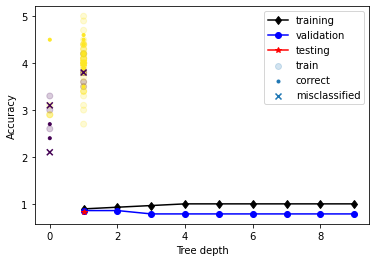

best depth = 1, test accuracy = 0.8333333333333334
accuracy is 83.3.


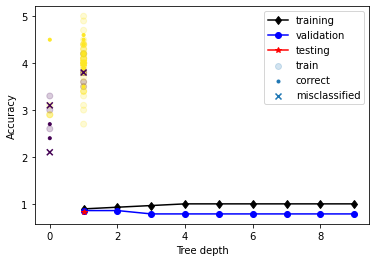

In [ ]:
cost_fns = [cost_misclassification, cost_entropy, cost_gini_index]
for cost_fn in cost_fns:
    best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va, cost_fn=cost_fn)
    predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test, cost_fn=cost_fn)
    display_predict_results(best_depth, x_train, y_train, x_test, y_test, cost_fn=cost_fn)

####Ex 5: Minimum leaf instances

In [ ]:
# Find the min leaf instances
for i in range(1, 15):
    dt = DecisionTree(num_classes=len(df_hepatitis.columns), max_depth=5, cost_fn=cost_fn, min_leaf_instances=i)
    y_test_prob = dt.fit(x_train, y_train).predict(x_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)
    test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
    print(f'best depth = 5, test accuracy = {test_accuracy}, number of leaves = {i}')

best depth = 5, test accuracy = 0.9583333333333334, number of leaves = 1
best depth = 5, test accuracy = 0.9583333333333334, number of leaves = 2
best depth = 5, test accuracy = 0.9583333333333334, number of leaves = 3
best depth = 5, test accuracy = 0.9583333333333334, number of leaves = 4
best depth = 5, test accuracy = 0.9583333333333334, number of leaves = 5
best depth = 5, test accuracy = 0.9583333333333334, number of leaves = 6
best depth = 5, test accuracy = 0.9583333333333334, number of leaves = 7
best depth = 5, test accuracy = 0.9166666666666666, number of leaves = 8
best depth = 5, test accuracy = 0.9166666666666666, number of leaves = 9
best depth = 5, test accuracy = 0.9166666666666666, number of leaves = 10
best depth = 5, test accuracy = 0.9166666666666666, number of leaves = 11
best depth = 5, test accuracy = 0.9166666666666666, number of leaves = 12
best depth = 5, test accuracy = 0.9166666666666666, number of leaves = 13
best depth = 5, test accuracy = 0.9166666666666



```
# This is formatted as code
```

####Ex 6: Min leaf = 15, Standard dataset, all features, misclass, entropy, gini

best depth = 1, test accuracy = 0.9583333333333334


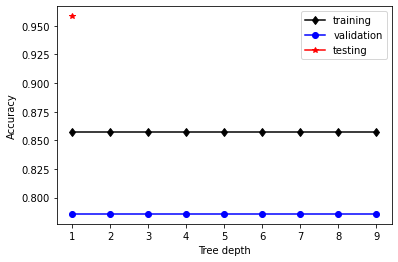

In [ ]:
# Cost function: Misclassification
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va, cost_fn=cost_misclassification, min_leaf_instances=15)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test, min_leaf_instances=15)

best depth = 1, test accuracy = 0.9583333333333334


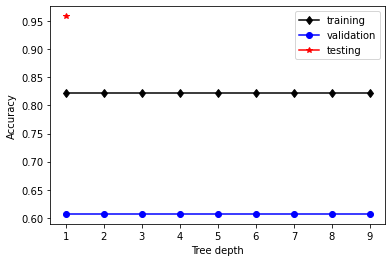

In [ ]:
# Cost function: Misclassification
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va, cost_fn=cost_entropy, min_leaf_instances=15)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test, min_leaf_instances=15)

best depth = 1, test accuracy = 0.9583333333333334


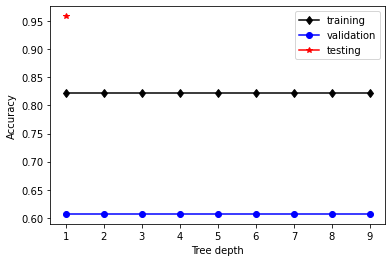

In [ ]:
# Cost function: Misclassification
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va, cost_fn=cost_gini_index, min_leaf_instances=15)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test, min_leaf_instances=15)

####Ex 7: Decisions Boundaries

In [ ]:
df_important_features = df_hepatitis.iloc[:, [0, 12, 17]] 
dataset_hepatitis = df_important_features.values
x, y = dataset_hepatitis[:, 1:],dataset_hepatitis[:, 0].astype(int)
(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)

num_train = int(0.8 * len(df_hepatitis))
x_train, y_train = x[inds[:num_train]], y[inds[:num_train]]
x_test, y_test = x[inds[num_train:]], y[inds[num_train:]]

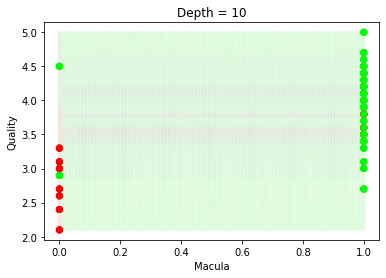

In [ ]:
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 100)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for tree_depth in [1,3,7,10]:
    model = DecisionTree(max_depth=tree_depth)
    y_train_prob = np.zeros((y_train.shape[0], num_classes+1))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    y_prob_all = model.fit(x_train, y_train).predict(x_all)
    zero_col = np.zeros((y_train.shape[0],1))
    zero_col_2 = np.zeros((y_prob_all.shape[0],1))
    plt.scatter(x_train[:,0], x_train[:,1], c=np.append(y_train_prob, zero_col, axis=1), marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=np.append(y_prob_all, zero_col_2, axis=1), marker='.', alpha=.01)
    plt.ylabel('Quality')
    plt.xlabel('Macula')
    plt.title('Depth = ' + str(tree_depth))
    plt.savefig('hepatitis_tree_depth' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)

###Hepatitis Data Set when retaining missing values

In [ ]:
url_hepatitis="http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"

hepatitis_names=['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 
                 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 
                 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN',
                 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'
                 ]

df_hepatitis=pd.read_csv(url_hepatitis, names=hepatitis_names)
df_hepatitis.replace(['?'],[0], inplace=True)
df_hepatitis = df_hepatitis.astype('float')
df_hepatitis = df_hepatitis.reset_index(drop=True)

####Ex 1: Standard dataset

In [ ]:
dataset_hepatitis = df_hepatitis.values
x, y = dataset_hepatitis[:, 1:],dataset_hepatitis[:, 0].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, shuffle = True)
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x_train, y_train, test_size=0.5, random_state=1, shuffle=True)

best depth = 3, test accuracy = 0.8085106382978723


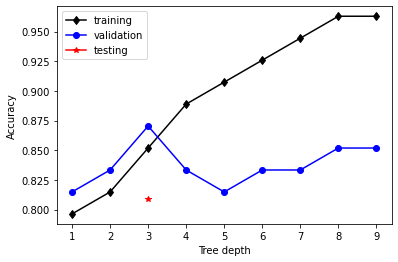

In [ ]:
# Find the best depth on the validation set
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test)

####Ex 2: 2 Best Features' Cosine Similarity

In [ ]:
df_important_features = df_hepatitis.iloc[:, [0, 12, 17]] 
dataset_hepatitis = df_important_features.values
x, y = dataset_hepatitis[:, 1:],dataset_hepatitis[:, 0].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, shuffle = True)
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x_train, y_train, test_size=0.5, random_state=1, shuffle=True)

best depth = 1, test accuracy = 0.8297872340425532


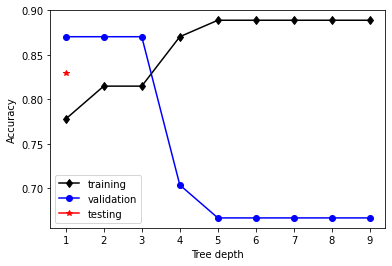

In [ ]:
# Find the best depth on the validation set
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test)

accuracy is 83.0.


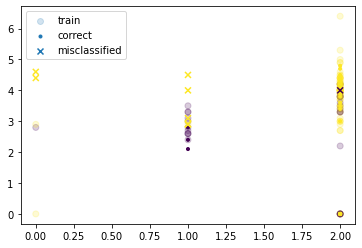

In [ ]:
# Display model's result on x_test set 
display_predict_results(best_depth, x_train, y_train, x_test, y_test)

####Ex 3: 3 Best Features' Cosine Similarity

In [ ]:
df_important_features = df_hepatitis.iloc[:, [0, 12, 17, 18]] 
dataset_hepatitis = df_important_features.values
x, y = dataset_hepatitis[:, 1:],dataset_hepatitis[:, 0].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, shuffle = True)
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x_train, y_train, test_size=0.5, random_state=1, shuffle=True)

best depth = 1, test accuracy = 0.8297872340425532


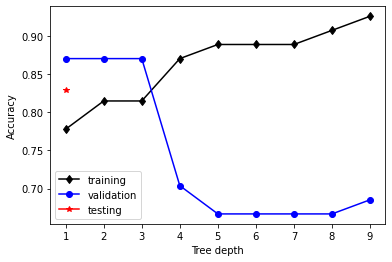

In [ ]:
# Find the best depth on the validation set
best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va)
# Using the best depth calculated from validation set, predict on the test set
predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test)

accuracy is 83.0.


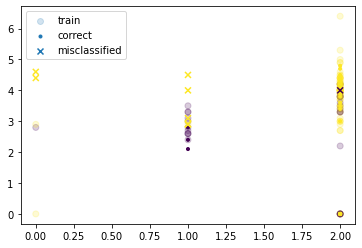

In [ ]:
# Display model's result on x_test set 
display_predict_results(best_depth, x_train, y_train, x_test, y_test)

####Ex 4: Different cost functions for Ex3:3 best features

best depth = 1, test accuracy = 0.8297872340425532
accuracy is 83.0.


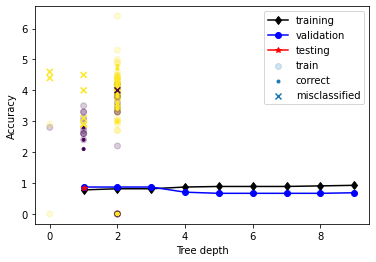

best depth = 3, test accuracy = 0.7872340425531915
accuracy is 78.7.


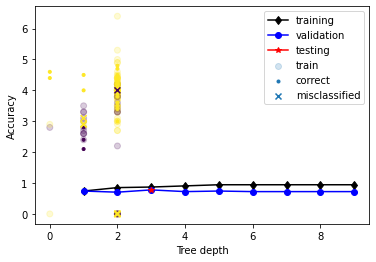

best depth = 3, test accuracy = 0.7659574468085106
accuracy is 76.6.


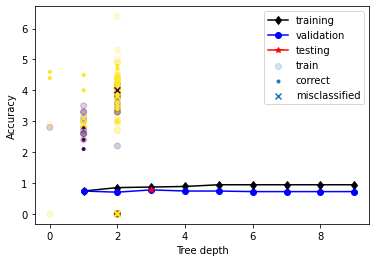

In [ ]:
cost_fns = [cost_misclassification, cost_entropy, cost_gini_index]
for cost_fn in cost_fns:
    best_depth, model_choices, train_acc, valid_acc = find_best_depth(x_train_tr, y_train_tr, x_train_va, y_train_va, cost_fn=cost_fn)
    predict_best_depth(best_depth, model_choices, train_acc, valid_acc, x_train, y_train, x_test, y_test, cost_fn=cost_fn)
    display_predict_results(best_depth, x_train, y_train, x_test, y_test, cost_fn=cost_fn)